In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os

In [2]:
data=pd.read_csv('/Volumes/T7/chroniclingamerica/cosine_similarity/chicago/00225879-part-00015-b1c639dc-2fc8-48be-8660-bd20c571e4e0-c000_cosine_similarity.csv')

In [3]:
data.columns

Index(['level_0', 'index', 'batch', 'series', 'date', 'ed', 'seq',
       'sourceFrame', 'issue', 'pos', 'collation', 'pp', 'sections',
       'replabel', 'repnote', 'height', 'width', 'frame', 'id', 'text',
       'sourceFile', 'section', 'pub_date', 'similarity'],
      dtype='object')

In [2]:
df_list=[]
for file in os.listdir('/Volumes/T7/chroniclingamerica/cosine_similarity/chicago/'):
    if file.endswith('.csv') and file.startswith('._'):
        pass
    else:
        df = pd.read_csv('/Volumes/T7/chroniclingamerica/cosine_similarity/chicago/' + file, usecols=['pub_date', 'text', 'similarity'], encoding='latin1')
        df_list.append(df)

In [3]:
sim_score=pd.concat(df_list)

In [6]:
data_sorted=np.sort(sim_score['similarity'].to_list())
p=1. * np.arange(len(sim_score['similarity'])) / (len(sim_score['similarity']) - 1)

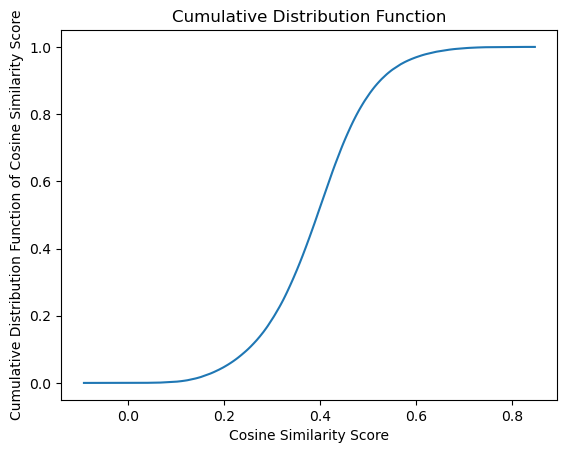

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(data_sorted, p)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Cumulative Distribution Function')
ax.set_ylabel('Cumulative Distribution Function of Cosine Similarity Score')
ax.set_xlabel('Cosine Similarity Score')
plt.show()

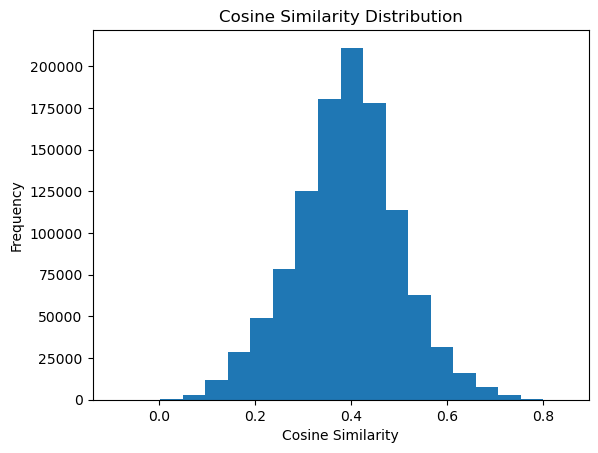

In [8]:
plt.hist(sim_score['similarity'], bins=20)
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Cosine Similarity Distribution')
plt.show()

In [8]:
sim_score.quantile(0.90)

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_1205/3000860908.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sim_score.quantile(0.90)


similarity    0.525058
Name: 0.9, dtype: float64

In [8]:
avg_score=sim_score.groupby('pub_date')['similarity'].mean()

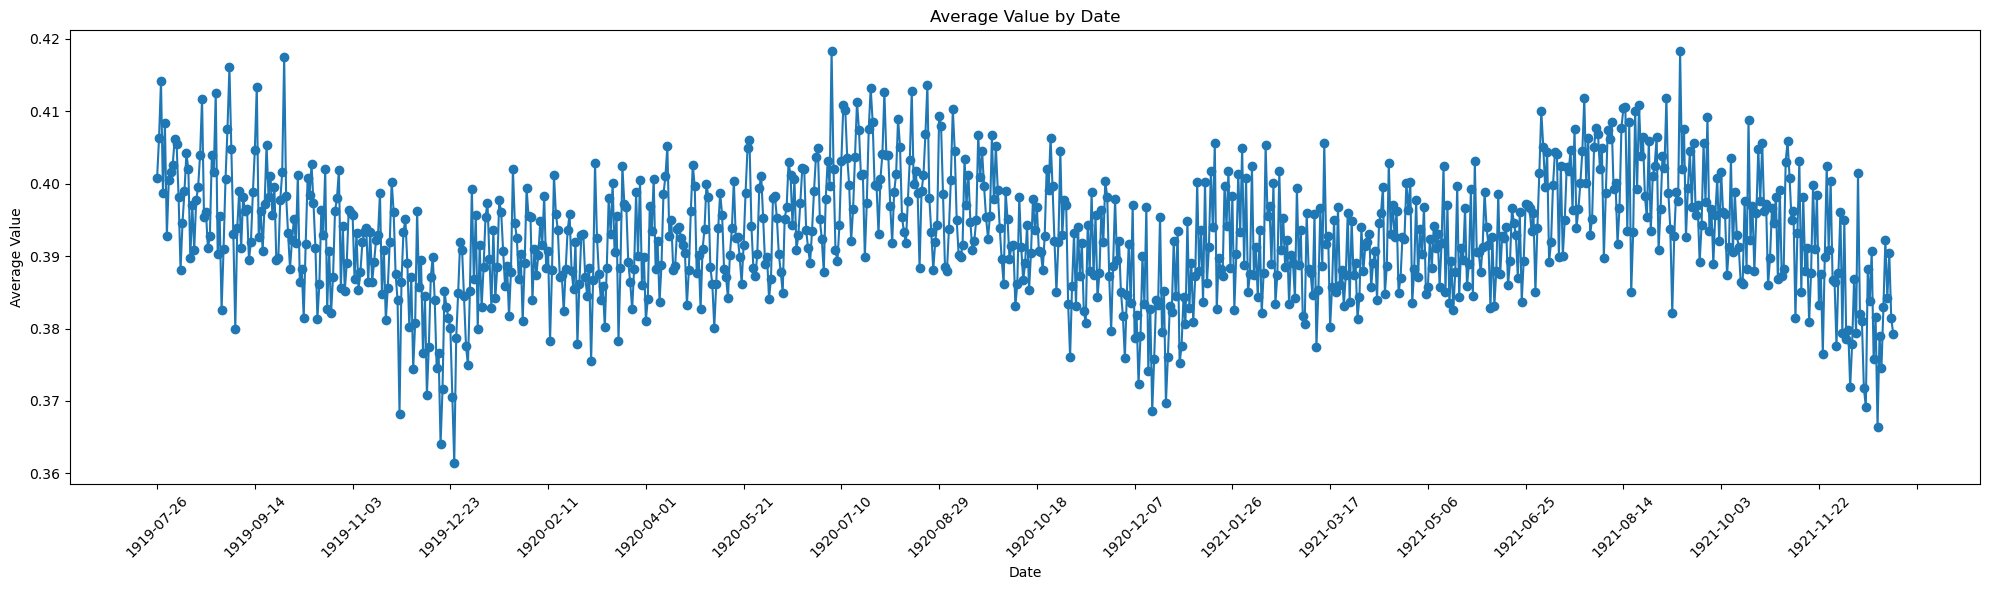

In [21]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(20, 6))
plt.plot(avg_score.index, avg_score.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.title('Average Value by Date')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=45)
# plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
sim_score[sim_score['similarity']>0.525958].sort_values(by='similarity', ascending=True).head(10).iloc[0].text

'| PAVLOVSKY ROTHERSn\nII GQ Successors to P. Pavlovsky & Sons lÃ\x82Â\xad\n1 Meat, Fruit, Vegetable and Fish Market -J\nI pphone~27] 316 STATE STREET 316\n\n| Reopening Of Our Remodeled and Enlarged\nI Market Saturday, August 14th\n\n1 A special invitation is extended to thePul^^^Amb^imd lun n^ori^^ to MW ^in cd^t^^ openmg |\nof a market second to none in theState.A visittoourne h m es andFish . new Department with us and we have scored\nand convenience is of the upper class The handling of Fruits, Vegetables andnsn is^^ ^ ^ sygtem fa a wom|er in it\nno expense to make these departments most attractive. U Ã¢Â\x80Â¢ti_Ã¢Â\x80Â\x9erpahoiit The fixtures of the Fruit and Vegetable Department will !\nself, it is a perfect beauty and modern to the mimite-None ever seen. Our department\nattract you then uniqueness and conveniencesof^service f.omtoow mafce them"ent-A big horse shoe counter wiU offer\nfor the handling of Fresh Fish is worthy of vJ,Ã\x82Â£Ã\x82Â« W--IcePooled o^s-Meats under co

In [13]:
sim_score.sort_values(by=['similarity'], ascending=True).head(10)

,text,pub_date,similarity
186,",--1\n\n. , ,, , - - -\n, . ,, , , . . , , . ,...",1921-07-28,-0.092068
21,"4\n'\nI .\n.\n\n' , '\n, . -\n, ,\n. .\n, ,\n,...",1921-07-12,-0.082519
26,"-\n, , . , . .\n- - . -1-..\n- ,-- - ,\n.. ,\n...",1921-07-13,-0.080650
118,"Familiar and Welcome Gifts\n. ,.1 ., , \.., ""...",1920-12-16,-0.077788
96,"\n,\n\n.\n. ,\n, , . ,\n-\n' , . . . . - .\n, ...",1921-07-19,-0.074709
123,".\ni- -.--:--\nI ' ----\n;-,,' ,,,..\n,P '.' ....",1921-07-21,-0.072345
30,".''' ''' ' ' ' "" '""'' '' ' '' "" ' ' ' ''\ni . ...",1921-10-20,-0.066689
727,", ----m-..-,,,,\n'' ' ''' ' ' - '' r'. - -' -....",1921-07-05,-0.064451
101,"-\n\n,, , ,,\n- , .\n, - , . . ,\n,\n.\n. , .....",1921-07-19,-0.062958
4,O\nYOU Are Keeping Them Warm!\n'll .\nK\nÃ¢ÂÂ...,1921-03-04,-0.061283


In [11]:
sim_score[sim_score['pub_date']<'1919-12-31'].sort_values(by=['similarity'], ascending=False).head(10).iloc[0]['text']

'CHICAGO SCENE OF\nFIERCE RACE RIOTS\nPOLICE UNABLE TO ESTIMATE\nNUMBER OF tfASUALTIES.Ã¢Â\x80Â\x94\nRUMORS SPREAD.\nOne Man Shot and Killed and Another\nSeriously Wounded in Strike Riot\non the Southwest Side of\nthe City.\nChicago.Ã¢Â\x80Â\x94Chicago\'s black belt was a\nbattlefield Monday night. Negroes\nand \\vhites fought in an area approxiÃ\x82Â\xad\nmately six miles square in the heart of\nthe city.\nPistols and rifles flashed and bullets\ncrashed through*street cars and buildÃ\x82Â\xad\nings and on the streets finding hunÃ\x82Â\xad\ndreds of victims.\nPolice patrols and hospital ambuÃ\x82Â\xad\nlances charged through the mobs amid\na hail of bullets, rescuing the wounded\nand recovering bodies of the dead.\nThe confusion was so great in the\ndistrict that the police were unable to\nplace an estimate either on the dead or\nwounded. Acting Chief of Police AlÃ\x82Â\xad\ncock received a report that three neÃ\x82Â\xad\ngroes and two whites had been killed.\nAnother rumor was to the 

In [12]:
os.getcwd()

'/Users/mstudio/repository/research/red-summer'

In [ ]:
sim_score[sim_score['pub_date']<'1919-08-27'].sort_values(by=['similarity'], ascending=False).head(500).to_csv('chicago-1919-500.csv')

In [22]:
sample_data=sim_score[sim_score['pub_date']<'1919-08-08'].sort_values(by=['similarity'], ascending=False)
sample_data['text']=sample_data['text'].str.replace('\n', ' ')
sample_data.head(200).to_csv('sample-month.csv')

In [23]:
sample_data.shape

(15880, 3)

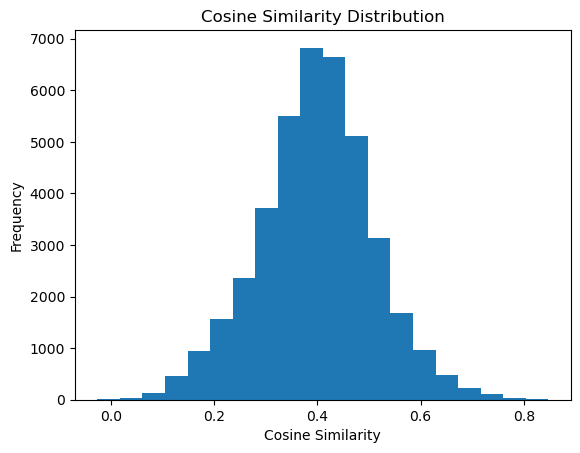

In [17]:
plt.hist(sample_data['similarity'], bins=20)
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Cosine Similarity Distribution')
plt.show()

In [16]:
sample_data['similarity'].mean()

0.39836325654705823

In [19]:
sample_data['similarity'].quantile(0.90)

0.5329649800000001

In [ ]:
sim_score[sim_score['pub_date']>'1920-09-01'].sort_values(by=['similarity'], ascending=False).head(10).iloc[1].text

'PROSECUTING ATTORNEY\nAMBUSHED IN ILLINOIS\nCowardly Attempted AssassinaÃ\x82Â\xad\ntion of Officer Charged to\nBootleggers\nROADHOUSES RAIDED\nMurders and Suicides CharacterÃ\x82Â\xad\nize Dry-Law Enforcement\nin Suckerdom\nTwo shots from ambush fired at\nStateÃ¢Â\x80Â\x99s Attorney Chaunccy W. Reed\nof DuPage County, 111., as he was moÃ\x82Â\xad\ntoring to his home at Naperville from\nWest Chicago, recently, were laid to\nmembers of a bootleggers ring. The\nÃ¢Â\x96Â\xa0 shooting was a sequel to the recent\nkilling of Chief of Police George\nReihm of West Chicago and the bombÃ\x82Â\xad\ning of the home of State\'s Attorney\nA. F.\'Smith of Lake County at WauÃ\x82Â\xad\nkegan. Both of these crimes were laid\nto members of the bootleggers ring.\nReihm like StateÃ¢Â\x80Â\x99s Attorney Smith\nof Lake County, had been leading nuÃ\x82Â\xad\nmerous raids on roadhouses and cabÃ\x82Â\xad\narets accused of selling gin and whisky\nand in spite of frequent death tiireats\nhe continued to prosecu

In [14]:
sim_score.sort_values(by='similarity', ascending=True).head(10).iloc[0].text

',--1\n\n. , ,, , - - -\n, . ,, , , . . , , . , , , , ,, , , , .. ,\n, , - -\n. . ., ... . - - . , , - . , . , . -\n. . - r \' \' - ,.;- , . , . , , , - , ,\n. - \' \'\'.\n\'- - \' \' \' . . - \' \'- -\'. .. - - - ; \' ; - \' - \' ,- - l\' .". . \'\' - \' . \'-- \':\'\' " THE -,BRIDGF2PORT TINIEESt, - - , - : -- , - -\n- - , , , , - . , . , . -, - . - .. ,,, , , , ,\n7 ,\n.\n, ,\n. -\n;7\' :--:- Th day July 28, 192 - - - -\nurs ,\n- . . ,\n,, , , . - - - .\n,\n. , , , ,\n, . -,.. , -- - - -\n, ,\n, , , ,\n,\n,\n1\n,, , . , , , , LIGHTHOUSE- OR- \'WILD AND RAGJINIG HUDSON. \' . -, . - .-- ,\n, , .\n..- . -\n-- , . ,\n-\n- - - -- - --,.,0,..k.--,,,,,,,K.,,,s,,,,,,:i?,,,,,.,...4,-,,,,,,:..,,,4 , , , ,\n\' - \' s- \' .-- This S,tom CriOSCS Daily at 5 .12.. M.., Sa.tur.-cia,y 6 P. MIL.- -, , 7 -,: ,,\n-\n. ..\nr.,w,w.,,-a,,,,,,,--:: - - ..... ,.,,....,-,,,,,,,,,,,,,,,,,,s- ---,, ,5Ã\x83Â½.p.-,,,:ommr,.:-.,:nrw:-,,.m:mr:fe,--,a,m,z,wkimmanim.,mAg--4 I yco - - - Ã\x83Â\x81 \'\n. , ,,\n,\n- . 

select the most similar sentences are detect reprints

In [2]:
from nltk import word_tokenize
from nltk import sent_tokenize
import pandas as pd
import numpy as np
import os

In [3]:
sample=pd.read_csv('/Volumes/T7/chroniclingamerica/cosine_similarity/sample-month.csv', usecols=['pub_date', 'text', 'similarity'], encoding='latin1')

In [39]:
for idx, val in sample.iterrows():
    print([val['pub_date']]*3)
    break

['1919-08-01', '1919-08-01', '1919-08-01']


In [6]:
sample['text']=sample['text'].str.replace('\n', ' ')
sample['text']=sample['text'].str.lower()

In [45]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# Sample dataframe
data = {
    'date': ['2023-08-25', '2023-08-28', '2023-08-30'],
    'text': [
        "This is the first sentence. Another one follows. A third sentence. fourth. fifth",
        "Here's a separate sentence. asds. asdsad. asdasdas. asdasdas. asdasdasd. asdasdas.as asdsa. sadadsasd.",
        "A single sentence for the third row."
    ]
}

df = pd.DataFrame(data)

# Function to group sentences
def group_sentences(text, n=3):
    sentences = sent_tokenize(text)
    grouped = [sentences[i:i+n] for i in range(0, len(sentences), n)]
    return grouped

tokenized_data = []

for index, row in df.iterrows():
    date = row['date']
    text = row['text']
    grouped_sentences = group_sentences(text)
    
    for group in grouped_sentences:
        combined_sentence = ' '.join(group)
        tokenized_data.append({'date': date, 'grouped_sentences': combined_sentence})

new_df = pd.DataFrame(tokenized_data)


[nltk_data] Downloading package punkt to /Users/mstudio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
new_df

,date,grouped_sentences
0,2023-08-25,This is the first sentence. Another one follow...
1,2023-08-25,fourth. fifth
2,2023-08-28,Here's a separate sentence. asds. asdsad.
3,2023-08-28,asdasdas. asdasdas. asdasdasd.
4,2023-08-28,asdasdas.as asdsa. sadadsasd.
5,2023-08-30,A single sentence for the third row.


In [18]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained SBERT model
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Sample dataframe
data = {
    'date': ['2023-08-25', '2023-08-25', '2023-08-26'],
    'text': [
        "This is the first sentence. Another one follows. A third sentence.",
        "Here's a separate sentence.",
        "A single sentence for the third row."
    ]
}

df = pd.DataFrame(data)

# Function to group sentences
def group_sentences(text, n=3):
    sentences = sent_tokenize(text)
    grouped = [sentences[i:i+n] for i in range(0, len(sentences), n)]
    return grouped

tokenized_data = []

for index, row in df.iterrows():
    date = row['date']
    text = row['text']
    grouped_sentences = group_sentences(text)
    
    for group in grouped_sentences:
        combined_sentence = ' '.join(group)
        tokenized_data.append({'date': date, 'grouped_sentences': combined_sentence})

new_df = pd.DataFrame(tokenized_data)

# Calculate cosine similarity between sentence groups
sentence_embeddings = sbert_model.encode(new_df['grouped_sentences'], convert_to_tensor=True)
cosine_scores = util.pytorch_cos_sim(sentence_embeddings, sentence_embeddings)

# Create a new column in the dataframe to store cosine similarity scores
new_df['cosine_similarity'] = [score.tolist() for score in cosine_scores]

# print(new_df)


[nltk_data] Downloading package punkt to /Users/mstudio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
new_df['avg_cosine']=new_df['cosine_similarity'].apply(lambda x: np.mean(x))

In [20]:
new_df

,date,grouped_sentences,cosine_similarity,avg_cosine
0,2023-08-25,This is the first sentence. Another one follow...,"[1.0000003576278687, 0.6853723526000977, 0.682...",0.789296
1,2023-08-25,Here's a separate sentence.,"[0.6853723526000977, 0.9999998807907104, 0.573...",0.752898
2,2023-08-26,A single sentence for the third row.,"[0.6825160980224609, 0.5733208656311035, 0.999...",0.751946


In [14]:
new_df['grouped_sentences'].loc[0]

'This is the first sentence. Another one follows. A third sentence.'

In [9]:
import numpy as np
np.mean(new_df['cosine_similarity'].loc[0])

0.7892963687578837

In [11]:
sample['text'].loc[199]

'.. 4m)w !. sm friday, august 1, 1919. page five f  the \'coconincrsun"  9ti  . ft r is!  life is jury\'s verdict in hubbell murder case; general disappointment at verdict  - adaltoni bigue no. 1, tho navajo indian, who, according to his own con-, fession, murdered charles hubbell )n\' cold blood at tho latter\'s trading post near oraibi on the night of march 24, , got off with a "life" sentence, tho jury bringing in their vedict of mur der in the first degreo, with that penã\x83â\x82ã\x82â\xad alty assessed, at 11 o\'clock saturday morning, after 17 hours\' deliberation. "the younger brother, aclalionl bigue no. 2, whose trial was to have begun on monday, enteied a plea of guilty of murder in tho second deã\x83â\x82ã\x82â\xad gree. because of his youthfulncss being only 17 and the fact that tho older brother swore that ho alono committed tho crime, although tho two were together, the plea was acã\x83â\x82ã\x82â\xad cepted, and on monday afternoon judge jones sentenced adaltoni bigue n

In [14]:
len(sent_tokenize(sample.loc[0, 'text']))

147

In [26]:
original_list = sent_tokenize(sample.loc[0, 'text'])  # Your list with 147 strings

grouped_lists = []
date_lists=[]
group_size = 5

for i in range(0, len(original_list), group_size):
    group = original_list[i:i+group_size]
    group = [string for string in group if any(c.isalnum() for c in string)]
    grouped_lists.append(group)
    date_lists.append()

In [32]:
len(original_list)

147

In [27]:
print(len(grouped_lists), len(date_lists))

30 30


In [28]:
grouped_lists[:3]

[['chicago scene of fierce race riots police unable to estimate number of tfasualties.ã\x83â¢ã\x82â\x80ã\x82â\x94 rumors spread.',
  'one man shot and killed and another seriously wounded in strike riot on the southwest side of the city.',
  "chicago.ã\x83â¢ã\x82â\x80ã\x82â\x94chicago's black belt was a battlefield monday night.",
  'negroes and \\vhites fought in an area approxiã\x83â\x82ã\x82â\xad mately six miles square in the heart of the city.',
  'pistols and rifles flashed and bullets crashed through*street cars and buildã\x83â\x82ã\x82â\xad ings and on the streets finding hunã\x83â\x82ã\x82â\xad dreds of victims.'],
 ['police patrols and hospital ambuã\x83â\x82ã\x82â\xad lances charged through the mobs amid a hail of bullets, rescuing the wounded and recovering bodies of the dead.',
  'the confusion was so great in the district that the police were unable to place an estimate either on the dead or wounded.',
  'acting chief of police alã\x83â\x82ã\x82â\xad cock received a repor

In [29]:
sample['pub_date'].unique()

array(['1919-08-01', '1919-07-28', '1919-07-30', '1919-07-29',
       '1919-07-31', '1919-08-06', '1919-08-02', '1919-08-07',
       '1919-08-05', '1919-08-03', '1919-08-04', '1919-07-26',
       '1919-07-27'], dtype=object)

In [31]:
date_lists

['1919-08-01',
 '1919-07-31',
 '1919-08-02',
 '1919-07-30',
 '1919-07-31',
 '1919-08-01',
 '1919-08-02',
 '1919-07-28',
 '1919-08-01',
 '1919-08-05',
 '1919-07-29',
 '1919-07-31',
 '1919-07-30',
 '1919-08-01',
 '1919-08-06',
 '1919-07-26',
 '1919-07-30',
 '1919-07-29',
 '1919-07-30',
 '1919-07-26',
 '1919-07-27',
 '1919-08-01',
 '1919-08-01',
 '1919-07-30',
 '1919-07-29',
 '1919-07-31',
 '1919-08-05',
 '1919-07-30',
 '1919-07-28',
 '1919-08-05']

In [8]:
def grouping_sentences(text):
    text=sent_tokenize(text)
    group_size=5
    grouped_lists=[]
    for i in range(0, len(text), group_size):
        group=text[i:i+group_size]
        group=[string for string in group if any(c.isalpha() for c in string)]
        grouped_lists.append(group)
    return grouped_lists   


In [29]:
' '.join(sample['text'][4:9])

'p*r < FACT SIX SERIES OF RACE RIOTS IN CHICAGO ON SU1 I Npgro and Wliitc Man Drown Several Injured?Trouble St at UIMh Street lleaeli.  Chicago, July 28.?A series in the negro district late Sun suited in the drowning of one the reported drowning of a man, probable fatal injury to i negro, the wounding of a pol and injury to a score of whit blacks by bullets or missiles. Police last night said they I situation well in hand. The trouble started at the \'1 ninth street beach, where whit blacks are segregated, and <?pi State street, the main thoroi in the heart of the negro <] which extends about live Shooting started near the There was also some shooting vicinity of State street. Altho feeling between whites and Ida the south side has extended period of months. einphasi: bomb explosions, some shootii numerous fights, yesterday\'s  .seem to have had their s\' art ii quarreling at the beach. Uepor negroes wandered across the d line to the white section of the and that whites amused then by 

In [28]:
' '.join(sample['text'][4:9]).replace('\n', ' ')

'p*r < FACT SIX SERIES OF RACE RIOTS IN CHICAGO ON SU1 I Npgro and Wliitc Man Drown Several Injured?Trouble St at UIMh Street lleaeli.  Chicago, July 28.?A series in the negro district late Sun suited in the drowning of one the reported drowning of a man, probable fatal injury to i negro, the wounding of a pol and injury to a score of whit blacks by bullets or missiles. Police last night said they I situation well in hand. The trouble started at the \'1 ninth street beach, where whit blacks are segregated, and <?pi State street, the main thoroi in the heart of the negro <] which extends about live Shooting started near the There was also some shooting vicinity of State street. Altho feeling between whites and Ida the south side has extended period of months. einphasi: bomb explosions, some shootii numerous fights, yesterday\'s  .seem to have had their s\' art ii quarreling at the beach. Uepor negroes wandered across the d line to the white section of the and that whites amused then by 

In [38]:
for file in os.listdir("/Volumes/T7/chroniclingamerica/redsummer-keyword/chicago"):
    if file=='sn85042414-part-00015-b1c639dc-2fc8-48be-8660-bd20c571e4e0-c000.csv':
        df=pd.read_csv("/Volumes/T7/chroniclingamerica/redsummer-keyword/chicago/" + file, usecols=['date', 'text'], encoding='latin1')


In [40]:
df['text']=df['text'].str.replace('\n', ' ')

In [46]:
df

,date,text
0,1919-07-18,i\ ft* Jl If i'4 -pry* its' I 1 1 a-vi...
1,1919-07-18,PAGE TWO. CONTESTANTS IN CLOSE RUN FOR MACHIN...
2,1919-07-18,"'-A! 1 Vâ¢-""' f.-,j 1 8 I *1 EDITION. [..."
3,1919-07-18,â¢C$$V 1 5. gf a PAGFVOUR. i-f--& ll'M ...
4,1919-07-18,Evte: ft' NING EDITION. for Society or STew...
...,...,...
583,1919-09-17,"K""Â£ ft'.- }f- r.f Â»r'fÂ» .v 1 â¢W'm ..."
584,1919-09-17,AGE EIGHT. 1 FOR BEAR WITH FOOTBALL VETS (D...
585,1919-09-17,"fW a W*ti Vv, 1 5 1 I 4 AGE TEN. At 4..."
586,1919-09-17,:Â»'1 tk so .48 *^l fiP: *60 i.O# 1.00 1.0...


In [51]:
test_text=[]
test_date=[]
for idx, val in df.iterrows():
    for i in grouping_sentences(val['text']):
        test_text.append(i)
        test_date.append(val['date'])
    break

In [52]:
print(len(test_date), len(test_text))

42 42


In [17]:
grouping_sentences(sample.loc[0, 'text'])

[['CHICAGO SCENE OF FIERCE RACE RIOTS POLICE UNABLE TO ESTIMATE NUMBER OF tfASUALTIES.Ã\x83Â¢Ã\x82Â\x80Ã\x82Â\x94 RUMORS SPREAD.',
  'One Man Shot and Killed and Another Seriously Wounded in Strike Riot on the Southwest Side of the City.',
  "Chicago.Ã\x83Â¢Ã\x82Â\x80Ã\x82Â\x94Chicago's black belt was a battlefield Monday night.",
  'Negroes and \\vhites fought in an area approxiÃ\x83Â\x82Ã\x82Â\xad mately six miles square in the heart of the city.',
  'Pistols and rifles flashed and bullets crashed through*street cars and buildÃ\x83Â\x82Ã\x82Â\xad ings and on the streets finding hunÃ\x83Â\x82Ã\x82Â\xad dreds of victims.'],
 ['Police patrols and hospital ambuÃ\x83Â\x82Ã\x82Â\xad lances charged through the mobs amid a hail of bullets, rescuing the wounded and recovering bodies of the dead.',
  'The confusion was so great in the district that the police were unable to place an estimate either on the dead or wounded.',
  'Acting Chief of Police AlÃ\x83Â\x82Ã\x82Â\xad cock received a repor

In [15]:
new=pd.DataFrame.from_dict({'test':grouping_sentences(sample.loc[0, 'text'])[0:4]})
new['val']=[0,0,0,0]

In [16]:
new

,test,val
0,[CHICAGO SCENE OF FIERCE RACE RIOTS POLICE UNA...,0
1,[Police patrols and hospital ambuÃÂÃÂ­ lanc...,0
2,[Blacks and whites swarmed through the South S...,0
3,"[He pulled his., revolver on the surging mass,...",0


In [43]:
csv_folder_path = "/Volumes/T7/chroniclingamerica/redsummer-keyword/"

In [45]:
from tqdm import tqdm

In [48]:
for file_name in tqdm(os.listdir(csv_folder_path + 'chicago'), desc="Processing files", position=0, leave=True):
        if file_name.endswith(".csv"):
            file_path = os.path.join(csv_folder_path + 'chicago', file_name)
            df = pd.read_csv(file_path, encoding='latin1')
            # print(df.columns)
            # break
        # break
            df['pub_date'] = pd.to_datetime(df['date'])
            print(df['pub_date'].min())
            break
        break
            newdf = df[df['pub_date'] >= '1919-07-27']
            # grouped_texts = grouping_sentences(newdf['text'])
            # if newdf.shape[0]==0:
            #     continue
            # else:

    

Processing files:   0%|          | 0/17207 [00:00<?, ?it/s]

1917-01-01 00:00:00


In [2]:
data=pd.read_feather('/Volumes/T7/chroniclingamerica/redsummer-keyword-article/chicago/sn85038292-part-00015-b1c639dc-2fc8-48be-8660-bd20c571e4e0-c000_article.feather')

In [3]:
data

,sent,date
0,SI.OO PER ANNUM. DOUBT HOUSE NEWS.1 TRANSFERS ...,1919-08-01
1,"Howard K. Diehl and Merviu K. Diehl, executors...",1919-08-01
2,"deceased, returned an inventory of debts, rece...",1919-08-01
3,"Trayer to Alexander B. tfhuli, 1 acre, 2 roods...",1919-08-01
4,George K. Drown et al. to Ella L. Brown et al....,1919-08-01
...,...,...
8061,"i ( ) FOR SALE! j Maxwell Roadster, 1918 Model...",1919-09-12
8062,"The thought , that the devouring element may e...",1919-09-12
8063,Discretion j ' ' BETTER PART OF BUILDING VALOR...,1919-09-12
8064,"Co., of f| Washington, D. C. These mules are o...",1919-09-12


In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Input text
input_text = "This is an example sentence."

# Preprocess the input text
input_tokens = tokenizer(input_text, return_tensors='pt', padding=True, truncation=True)
with torch.no_grad():
    input_output = model(**input_tokens)

input_embedding = input_output.last_hidden_state.mean(dim=1)  # Average pooling

# Folder containing Feather files
folder_path = '/path/to/feather/files/'

# Get list of Feather files in the folder
feather_files = [f for f in os.listdir(folder_path) if f.endswith('.feather')]

similarities = []

# Iterate through each Feather file and calculate cosine similarity
for file_name in tqdm(feather_files, desc="Processing files"):
    file_path = os.path.join(folder_path, file_name)
    
    # Read Feather file into a DataFrame
    df = pd.read_feather(file_path)
    
    # Calculate cosine similarity for each row in the DataFrame
    for idx, row in df.iterrows():
        text = row['text']
        text_tokens = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            text_output = model(**text_tokens)

        text_embedding = text_output.last_hidden_state.mean(dim=1)  # Average pooling
        cosine_sim = cosine_similarity(input_embedding, text_embedding).item()
        similarities.append((file_name, idx, cosine_sim))

# Create a DataFrame to store results
result_df = pd.DataFrame(similarities, columns=['File', 'Row', 'Cosine Similarity'])

print(result_df)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                          text  cosine_similarity
0  This is the first sentence.           0.780092
1        Another example here.           0.795061
2       BERT is great for NLP.           0.448996
